Patlolla, Akhil Reddy<br>
Z1803493<br>
CSCI 680 - Assignment 1

In [61]:
from prettytable import PrettyTable
from matplotlib import pyplot as plt
import numpy as np
import statistics as stat
from sklearn import datasets
boston = datasets.load_boston()
from scipy.stats import pearsonr
from math import sqrt


# 1. Housing Price Analysis
Use the usual summary statistics (min, q1, median, q3, max, as well as mean and std dev) to give a brief overview of housing price statistics. Display these in whatever way you see fit. Include the summary stats for the price (MEDV) and the features: crime rate(CRIM), rooms per dwelling (RM), and zero or more of the several others as you see fit.

Hint: Once you can do this for one feature, it should be simple to write a loop to do
many features

In [2]:

def call_stat(local_temp):
    quartile_first.append(np.percentile(local_temp,25))
    quartile_third.append(np.percentile(local_temp,75))
    standard_deviation.append(stat.stdev(local_temp))
    d_median.append(np.median(local_temp))
    d_mean.append(np.mean(local_temp))

quartile_first = [];quartile_third = [];standard_deviation = [];d_median = [];d_mean = [];quartile_third =[]
header = ['Feature','First Quartile','Third Quartile','Standard Deviation','Median','Mean']
features = ['MEDV','CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS', 'RAD','TAX','PTRATIO','B','LSTAT']
t = PrettyTable(header)
call_stat(boston.target)
for i in range(len(features)-1):
    call_stat((boston.data[:,i:i+1].reshape(boston.data.shape[0],)))
for i in range(len(features)):
    if(i is 2 or i is 4):
        continue
    t.add_row([features[i],quartile_first[i],quartile_third[i],standard_deviation[i],d_median[i],d_mean[i]])
print("1. Housing Price Analysis \n Summary Statistics:")
print(t)


1. Housing Price Analysis 
 Summary Statistics:
+---------+----------------+----------------+---------------------+---------+----------------+
| Feature | First Quartile | Third Quartile |  Standard Deviation |  Median |      Mean      |
+---------+----------------+----------------+---------------------+---------+----------------+
|   MEDV  |     17.025     |      25.0      |  9.197104087379817  |   21.2  | 22.5328063241  |
|   CRIM  |    0.082045    |   3.6474225    |   8.59678259332332  | 0.25651 | 3.59376071146  |
|  INDUS  |      5.19      |      18.1      |  6.860352940897585  |   9.69  | 11.1367786561  |
|   NOX   |     0.449      |     0.624      | 0.11587767566755595 |  0.538  | 0.554695059289 |
|    RM   |     5.8855     |     6.6235     |  0.7026171434153233 |  6.2085 | 6.28463438735  |
|   AGE   |     45.025     |     94.075     |  28.148861406903617 |   77.5  | 68.5749011858  |
|   DIS   |    2.100175    |    5.188425    |  2.105710126627611  | 3.20745 | 3.79504268775  |
| 

# 2. Price Correlation
## 2.1
For each of the features you analyzed above, generate a scatter plot of the feature vs.
price and report the Pearson coefficient. The plot should be clearly labelled and titled.


Crime Rate per capita by town


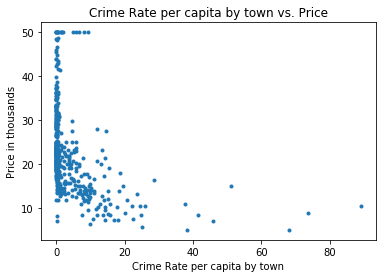

Proportion of residential land zoned for lots over 25,000 sq.ft.


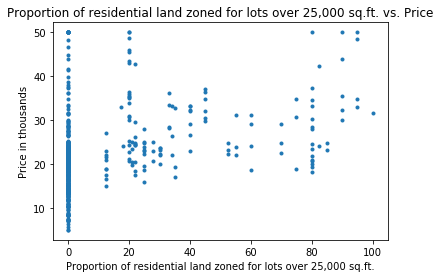

Proportion of non-retail business acres per town


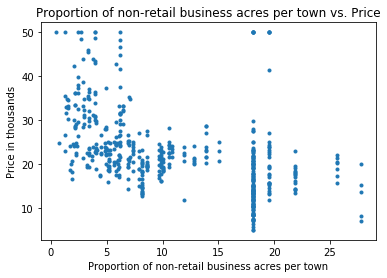

Nitric oxides concentration (parts per 10 million)


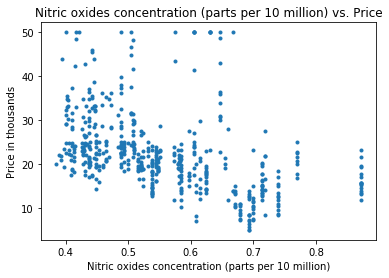

Average number of rooms per dwelling


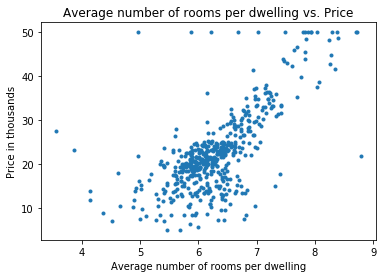

Proportion of owner-occupied units( built prior to 1940 )


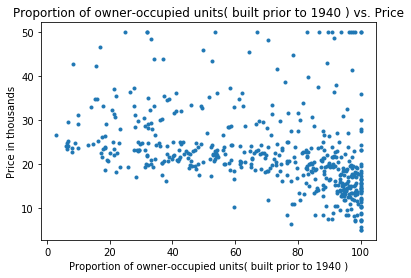

Weighted distances to five Boston employment centres


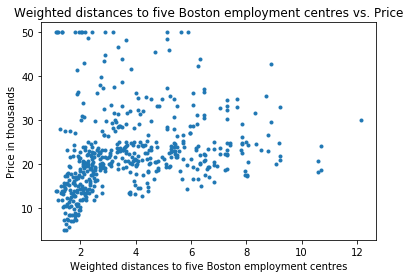

Index of accessibility to radial highways


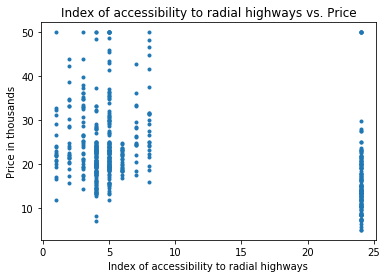

Full-value property-tax rate per $10,000


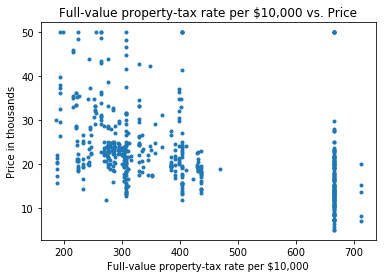

Pupil-teacher ratio by town


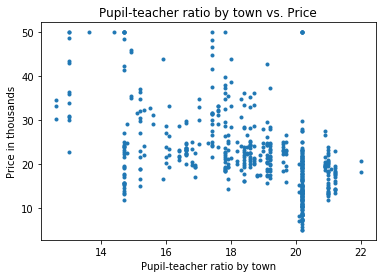

1000(Bk - 0.63)^2  ( Bk is the proportion of blacks by town )


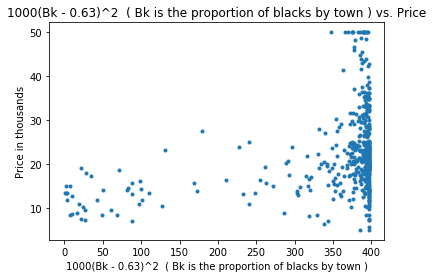

% lower status of the population


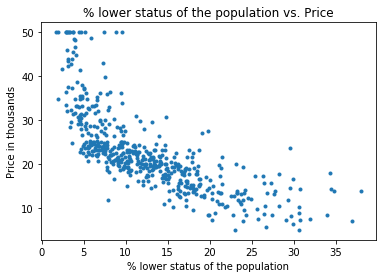

In [13]:
def plot_data(x, y, x_label):
    plt.plot(x, y, ".")
    plt.ylabel("Price in thousands")
    plt.xlabel(x_label)
    plt.title(x_label + " vs. Price")
    plt.show()

lables = ["Crime Rate per capita by town","Proportion of residential land zoned for lots over 25,000 sq.ft.",
          "Proportion of non-retail business acres per town","",
    "Nitric oxides concentration (parts per 10 million)","Average number of rooms per dwelling",
    "Proportion of owner-occupied units( built prior to 1940 )","Weighted distances to five Boston employment centres",
    "Index of accessibility to radial highways","Full-value property-tax rate per $10,000",
    "Pupil-teacher ratio by town","1000(Bk - 0.63)^2  ( Bk is the proportion of blacks by town )",
    "% lower status of the population"]
for i in range(len(features)-1):
    if( i is 3):
        continue
    print(lables[i])
    plot_data(boston.data[:,i:i+1].reshape(boston.data.shape[0]),boston.target,lables[i])


## 2.2
Identify the feature you analyzed which relates to price the best, and which relates the
worst.

In [8]:
#co relation between price and featuer matrix lease value is worst feature and highest value is the best feature
log_corel = []
for i in range(boston.data[0].shape[0]):
    temp = pearsonr(boston.target,boston.data[:,i:i+1].reshape(boston.data.shape[0]))[0]
    if (temp < 0):
        temp = temp * -1
    log_corel.append(temp)

print("Best Feature with respect to price : ",features[log_corel.index(max(log_corel))])
print("Worst Feature with respect to price : ",features[log_corel.index(min(log_corel))])

Best Feature with respect to price :  B
Worst Feature with respect to price :  INDUS


# 3. Home Similarities
Using all available features, including price, find the 5 most similar homes for each of
the following homes:
<table>
<th>Index</th> <th>MEDV</th>
<tr><td>154 </td><td> 17.0</td></tr>
<tr><td>203 </td><td> 48.5</td></tr>
<tr><td>485 </td><td> 21.2</td></tr>
</table>

In [94]:
def det_Value(temp):
    s=0
    for i in range(temp.shape[0]):
        s = s + temp[i]*temp[i]
    return (sqrt(s))

cosine=[];similar_index=[]
for i in range(boston.target.shape[0]):
    if i is 154:
        continue
    cosine.append(np.dot(np.append(boston.data[154],boston.target[154]),np.append(boston.data[i],boston.target[i]))/(det_Value(np.append(boston.data[154],boston.target[154]))*det_Value(np.append(boston.data[i],boston.target[i]))))

for i in np.argsort(cosine)[-5:]:
        similar_index.append(i)
print(similar_index)
print("Index and price similar to 154th index house :\nIndex\tPrice ")
for i in similar_index:
    print(i,"\t",boston.target[i])
cosine=[];similar_index=[]
for i in range(boston.target.shape[0]):
    if i is 154:
        continue
    cosine.append(np.dot(np.append(boston.data[203],boston.target[203]),np.append(boston.data[i],boston.target[i]))/(det_Value(np.append(boston.data[154],boston.target[154]))*det_Value(np.append(boston.data[i],boston.target[i]))))
cosine = np.array(cosine)
for i in np.argsort(cosine)[-5:]:
        similar_index.append(i)
print(similar_index)
print("Index and price similar to 203rd index house :\nIndex\tPrice ")
for i in similar_index:
    print(i,"\t",boston.target[i])
cosine=[];similar_index=[]
for i in range(boston.target.shape[0]):
    if i is 154:
        continue
    cosine.append(np.dot(np.append(boston.data[485],boston.target[485]),np.append(boston.data[i],boston.target[i]))/(det_Value(np.append(boston.data[154],boston.target[154]))*det_Value(np.append(boston.data[i],boston.target[i]))))

for i in np.argsort(cosine)[-5:]:
        similar_index.append(i)
print(similar_index)
print("Index and price similar to 485th index house :\nIndex\tPrice ")
for i in similar_index:
    print(i,"\t",boston.target[i])





[152, 159, 115, 151, 168]
Index and price similar to 154th index house :
Index	Price 
152 	 15.3
159 	 23.3
115 	 18.3
151 	 19.6
168 	 23.8
[282, 255, 55, 203, 202]
Index and price similar to 203rd index house :
Index	Price 
282 	 46.0
255 	 20.9
55 	 35.4
203 	 48.5
202 	 42.3
[479, 468, 482, 486, 484]
Index and price similar to 485th index house :
Index	Price 
479 	 21.4
468 	 19.1
482 	 25.0
486 	 19.1
484 	 20.6


# 4. Augmenting the House Price Data
Finally, you should identify a new dataset that could be potentially integrated with the
existing data. You should provide a link and description of the new dataset, describe
what valuable information the data might add, and identify any issues you might have in
integrating the new data. Note, you do not need to actually integrate the two datasets;
for this homework, a description is sufficient.
